In [1]:
import re
import pandas as pd
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [2]:
train=pd.read_csv("file:///C:/Users/Avinash/Downloads/tweets_train_E6oV3lV.csv")
test=pd.read_csv("file:///C:/Users/Avinash/Downloads/test_tweets_anuFYb8.csv")

In [3]:
print(test.shape)
train.shape

(17197, 2)


(31962, 3)

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
combi=train.append(test,ignore_index=True)

C:\Users\Avinash\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [7]:
combi.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [8]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)
        
    return input_txt

In [9]:
combi['tidy_tweet']=np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")

In [10]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
combi['tidy_tweet']=combi['tidy_tweet'].str.replace("[^a-zA-Z#]","  ")

combi.head()

In [12]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all th...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [13]:
combi['tidy_tweet']=combi['tidy_tweet'].apply(lambda x:'  '.join([w for w in x.split() if len(w)>3]))

In [14]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags k...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer whe...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [15]:
from nltk.tokenize import word_tokenize

In [16]:
tokenized_tweet=combi['tidy_tweet'].apply(lambda x: x.split())

In [18]:
combi['tidy_tweet_1'] = combi.apply(lambda row: word_tokenize(row['tidy_tweet']),axis=1)


In [19]:
combi.head()

,id,label,tweet,tidy_tweet,tidy_tweet_1
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags k...,"[when, father, dysfunctional, selfish, drags, ..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer whe...,"[thanks, #, lyft, credit, cause, they, offer, ..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time,"[#, model, love, take, with, time]"
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,"[factsguide, society, #, motivation]"


In [20]:
from nltk.stem.porter import*
stemmer=PorterStemmer()

In [21]:
tokenized_tweet=tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [23]:
combi['tidy_tweet_1']=combi['tidy_tweet_1'].apply(lambda x: [stemmer.stem(i)for i in x])

In [24]:
combi.head()

,id,label,tweet,tidy_tweet,tidy_tweet_1
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags k...,"[when, father, dysfunct, selfish, drag, kid, i..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer whe...,"[thank, #, lyft, credit, caus, they, offer, wh..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesti]"
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time,"[#, model, love, take, with, time]"
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,"[factsguid, societi, #, motiv]"


In [25]:

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=tokenized_tweet[i]
    

In [26]:

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])

In [28]:
combi['tidy_tweet']=tokenized_tweet

In [29]:
combi.head()

,id,label,tweet,tidy_tweet,tidy_tweet_1
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...,"[when, father, dysfunct, selfish, drag, kid, i..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...,"[thank, #, lyft, credit, caus, they, offer, wh..."
2,3,0.0,bihday your majesty,bihday your majesti,"[bihday, your, majesti]"
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time,"[#, model, love, take, with, time]"
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv,"[factsguid, societi, #, motiv]"


In [30]:
combi['tidy_tweet'].dtypes

dtype('O')

In [31]:
all_words = ' '.join(' '.join(txt) for txt in combi['tidy_tweet'])

In [37]:
racist_words = ' '.join(''.join(txt) for txt in combi['tidy_tweet'][combi['label']==1])

In [1]:
from wordcloud import WordCloud

In [34]:
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(racist_words)

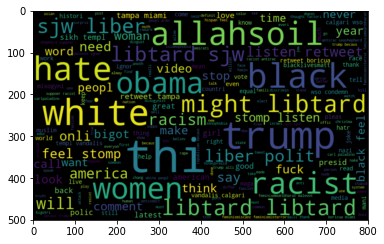

<Figure size 1440x1440 with 0 Axes>

In [35]:
plt.imshow(wordcloud,interpolation="bilinear")
plt.figure(figsize=(20,20))
plt.show()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer


In [41]:
bow_vect = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vect.fit_transform(combi['tidy_tweet'])

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [47]:
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]

In [75]:
xtrain,xvalid,ytrain,yvalid=train_test_split(train_bow,train['label'],test_size=0.3)

In [82]:
yvalid.dtype

dtype('int64')

In [54]:
lreg=LogisticRegression()
lreg.fit(xtrain,ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
prediction=lreg.predict(xvalid)

In [71]:
prediction.dtype

dtype('int64')

In [58]:
f1_score(yvalid, prediction)

0.49645390070921985

In [88]:
test_pred=lreg.predict(test_bow)

In [89]:
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
test['label']=test_pred

In [92]:
test

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0
5,31968,choose to be :) #momtips,0
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,0
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,0
8,31971,@user @user @user i will never understand why...,0
9,31972,#delicious #food #lovelife #capetown mannaep...,0
